<a href="https://colab.research.google.com/github/nehagupta2103/DL-for-Predictive-Maintenance/blob/main/BA%26Deep_Learning_for_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Remaining Useful Life 
<p style="margin:30px">
    <img style="display:inline; margin-right:50px" width=50% src="https://www.featuretools.com/wp-content/uploads/2017/12/FeatureLabs-Logo-Tangerine-800.png" alt="Featuretools" />
    <img style="display:inline" width=15% src="https://upload.wikimedia.org/wikipedia/commons/e/e5/NASA_logo.svg" alt="NASA" />
</p>

The general setup for the problem is a common one: we have a single table of sensor observations over time. Now that collecting information is easier than ever, most industries have already generated *time-series* type problems by the way that they store data. As such, it is crucial to be able to handle data in this form.

We'll demonstrate an end-to-end workflow using a [Turbofan Engine Degradation Simulation Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan) from NASA. This notebook demonstrates a rapid way to predict the Remaining Useful Life (RUL) of an engine using an initial dataframe of time-series data.

# Deep Learning for Predictive Maintenance

Deep learning has proven to show superior performance in certain domains such as object recognition and image classification. It has also gained popularity in  domains such as finance where time-series data plays an important role. Predictive Maintenance is also a domain where data is collected over time to monitor the state of an asset with the goal of finding patterns to predict failures which can also benefit from certain deep learning algorithms. Among the deep learning methods, Long Short Term Memory [(LSTM)](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) networks are especially appealing to the predictive maintenance domain due to the fact that they are very good at learning from sequences. This fact lends itself to their applications using time series data by making it possible to look back for longer periods of time to detect failure patterns. In this notebook, we build an LSTM network for the data set and scenerio described at [Predictive Maintenance Template](https://gallery.cortanaintelligence.com/Collection/Predictive-Maintenance-Template-3) to predict remaining useful life of aircraft engines. In summary, the template uses simulated aircraft sensor values to predict when an aircraft engine will fail in the future so that maintenance can be planned in advance. 

This notebook serves as a tutorial for beginners looking to apply deep learning in predictive maintenance domain and uses a simple scenario where only one data source (sensor values) is used to make predictions. In more advanced predictive maintenance scenarios such as in [Predictive Maintenance Modelling Guide](https://gallery.cortanaintelligence.com/Notebook/Predictive-Maintenance-Modelling-Guide-R-Notebook-1), there are many other data sources (i.e. historical maintenance records, error logs, machine and operator features etc.) which may require different types of treatments to be used in the deep learning networks. Since predictive maintenance is not a typical domain for deep learning, its application is an open area of research. 

This notebook uses [keras](https://keras.io/) deep learning library with Microsoft Cognitive Toolkit [CNTK](https://docs.microsoft.com/en-us/cognitive-toolkit/Using-CNTK-with-Keras) as backend.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
!pip install --upgrade numpy==1.16.1
!pip install tensorflow==2.0.0-beta1
import tensorflow as tf

tf.__version__
print("TensorFlow version: {}".format(tf.__version__))



print("Eager execution: {}".format(tf.executing_eagerly()))

tf.keras.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.3 MB 714 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires numpy>=1.18, but you have numpy 1.16.1 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.16.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.16.1 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.16.1 which is incompatible.
scikit-image 0.18.3 requires numpy>=1.16.5, but you have numpy 1.16.1 which is incompatible.
pywavelets 1.3.0 requires numpy>=1.17.3, but you 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-beta1 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcolab20220516111314, 2.8.1+zzzcolab20220518083849, 2.8.2, 2.8.2+zzzcolab20220523105045, 2.8.2+zzzcolab20220527125636, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERR

'2.8.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline

## Data Ingestion
In the following section, we ingest the training, test and ground truth datasets from azure storage. The training data consists of multiple multivariate time series with "cycle" as the time unit, together with 21 sensor readings for each cycle. Each time series can be assumed as being generated from a different engine of the same type. The testing data has the same data schema as the training data. The only difference is that the data does not indicate when the failure occurs. Finally, the ground truth data provides the number of remaining working cycles for the engines in the testing data. You can find more details about the type of data used for this notebook at [Predictive Maintenance Template](https://gallery.cortanaintelligence.com/Collection/Predictive-Maintenance-Template-3).

In [4]:
# Data ingestion - reading the datasets from Azure blob 
!wget http://azuremlsamples.azureml.net/templatedata/PM_train.txt 
!wget http://azuremlsamples.azureml.net/templatedata/PM_test.txt
!wget http://azuremlsamples.azureml.net/templatedata/PM_truth.txt 

--2022-06-19 23:50:12--  http://azuremlsamples.azureml.net/templatedata/PM_train.txt
Resolving azuremlsamples.azureml.net (azuremlsamples.azureml.net)... 13.107.246.39, 13.107.213.39, 2620:1ec:bdf::39, ...
Connecting to azuremlsamples.azureml.net (azuremlsamples.azureml.net)|13.107.246.39|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3515356 (3.4M) [text/plain]
Saving to: ‘PM_train.txt’

PM_train.txt        100%[===================>]   3.35M  20.0MB/s    in 0.2s    

2022-06-19 23:50:13 (20.0 MB/s) - ‘PM_train.txt’ saved [3515356/3515356]

--2022-06-19 23:50:13--  http://azuremlsamples.azureml.net/templatedata/PM_test.txt
Resolving azuremlsamples.azureml.net (azuremlsamples.azureml.net)... 13.107.246.39, 13.107.213.39, 2620:1ec:bdf::39, ...
Connecting to azuremlsamples.azureml.net (azuremlsamples.azureml.net)|13.107.246.39|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2228855 (2.1M) [text/plain]
Saving to: ‘PM_test.txt’

PM_test.txt

In [5]:
# read training data 
train_df = pd.read_csv('PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

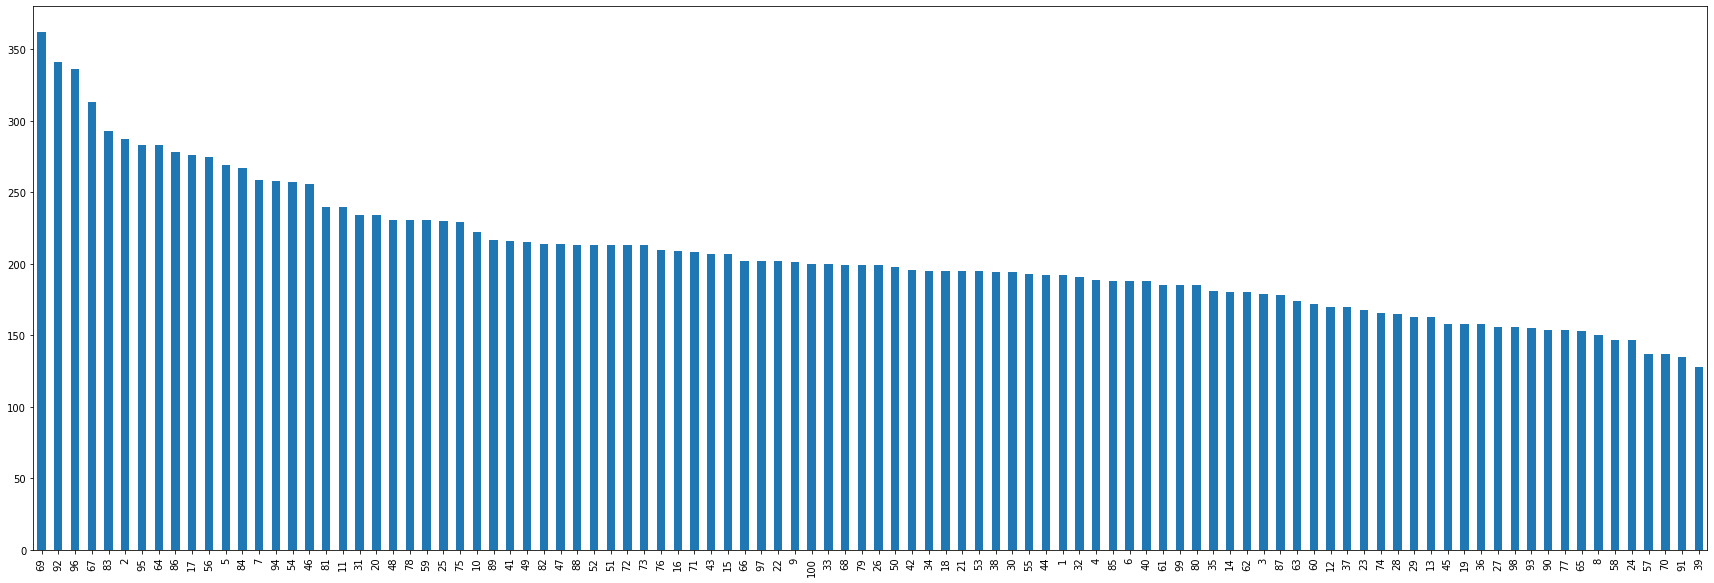

In [6]:
train_df.id.value_counts().plot.bar(figsize=(30,10))

In [7]:
# read test data
test_df = pd.read_csv('PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [8]:
# read ground truth data
truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

In [9]:
print(len(truth_df))

100


In [10]:
print(len(train_df))

20631


In [11]:
print(test_df)

        id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29   
1        1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45   
2        1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94   
3        1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12   
4        1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19   
...    ...    ...       ...       ...       ...     ...     ...      ...   
13091  100    194    0.0049    0.0000     100.0  518.67  643.24  1599.45   
13092  100    195   -0.0011   -0.0001     100.0  518.67  643.22  1595.69   
13093  100    196   -0.0006   -0.0003     100.0  518.67  643.44  1593.15   
13094  100    197   -0.0038    0.0001     100.0  518.67  643.26  1594.99   
13095  100    198    0.0013    0.0003     100.0  518.67  642.95  1601.62   

            s4     s5  ...     s12      s13      s14     s15   s16  s17   s18  \
0     

In [12]:
train_df = train_df.sort_values(['id','cycle'])
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Data Preprocessing
First step is to generate labels for the training data which are Remaining Useful Life (RUL), label1 and label2 as was done in the [Predictive Maintenance Template](https://gallery.cortanaintelligence.com/Collection/Predictive-Maintenance-Template-3). Here, we will only make use of "label1" for binary clasification, while trying to answer the question: 
**Is a specific engine going to fail within w1 cycles?**

In [13]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [14]:
# generate label columns for training data
w1 = 15
w0 = 5
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
#train_df.head()

In the [Predictive Maintenance Template](https://gallery.cortanaintelligence.com/Collection/Predictive-Maintenance-Template-3) , cycle column is also used for training so we will also include the cycle column. Here, we normalize the columns in the training data.

In [15]:
# MinMax normalization
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
#train_df.head()

Next, we prepare the test data. We first normalize the test data using the parameters from the MinMax normalization applied on the training data. 

In [16]:
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
#test_df.head()

In [17]:
print(len(test_df))

13096


Next, we use the ground truth dataset to generate labels for the test data.

In [18]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [19]:
# generate RUL for test data
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
#test_df.head()

In [20]:
print(len(test_df))

13096


In [21]:
# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
#test_df.head()

In [22]:
print(len(test_df))

13096


In the rest of the notebook, we train an LSTM network that we will compare to the results in [Predictive Maintenance Template Step 2B of 3](https://gallery.cortanaintelligence.com/Experiment/Predictive-Maintenance-Step-2B-of-3-train-and-evaluate-binary-classification-models-2) where a series of machine learning models are used to train and evaluate the binary classification model that uses column "label1" as the label.

## Modelling

The traditional predictive maintenance machine learning models are based on feature engineering which is manual construction of right features using domain expertise and similar methods. This usually makes these models hard to reuse since feature engineering is specific to the problem scenario and the available data which varies from one business to the other. Perhaps the most attractive part of applying deep learning in the predictive maintenance domain is the fact that these networks can automatically extract the right features from the data, eliminating the need for manual feature engineering.

When using LSTMs in the time-series domain, one important parameter to pick is the sequence length which is the window for LSTMs to look back. This may be viewed as similar to picking window_size = 5 cycles for calculating the rolling features in the [Predictive Maintenance Template](https://gallery.cortanaintelligence.com/Collection/Predictive-Maintenance-Template-3) which are rolling mean and rolling standard deviation for 21 sensor values. The idea of using LSTMs is to let the model extract abstract features out of the sequence of sensor values in the window rather than engineering those manually. The expectation is that if there is a pattern in these sensor values within the window prior to failure, the pattern should be encoded by the LSTM.

One critical advantage of LSTMs is their ability to remember from long-term sequences (window sizes) which is hard to achieve by traditional feature engineering. For example, computing rolling averages over a window size of 50 cycles may lead to loss of information due to smoothing and abstracting of values over such a long period, instead, using all 50 values as input may provide better results. While feature engineering over large window sizes may not make sense, LSTMs are able to use larger window sizes and use all the information in the window as input. Below, we illustrate the approach.


In [23]:
# pick a large window size of 50 cycles
sequence_length = 30

Let's first look at an example of the sensor values 50 cycles prior to the 

---

failure for engine id 3. We will be feeding LSTM network this type of data for each time step for each engine id. 

In [24]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 3
engine_id3 = test_df[test_df['id'] == 3]
engine_id3_50cycleWindow = engine_id3[engine_id3['RUL'] <= engine_id3['RUL'].min() + 50]
cols1 = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
cols2 = ['s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]

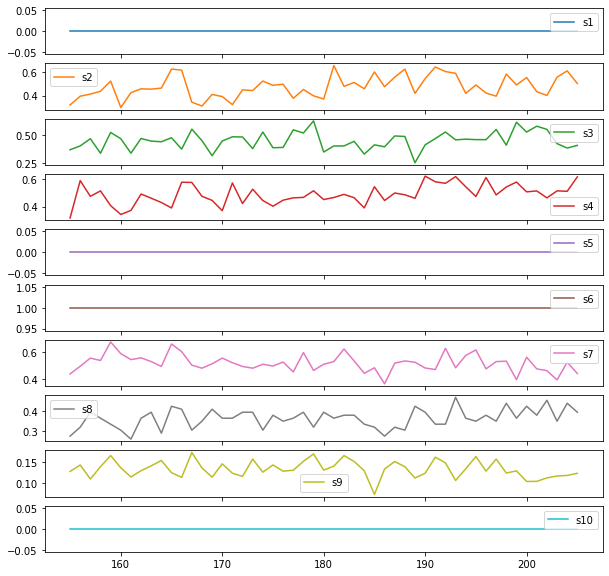

In [25]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(10,10))

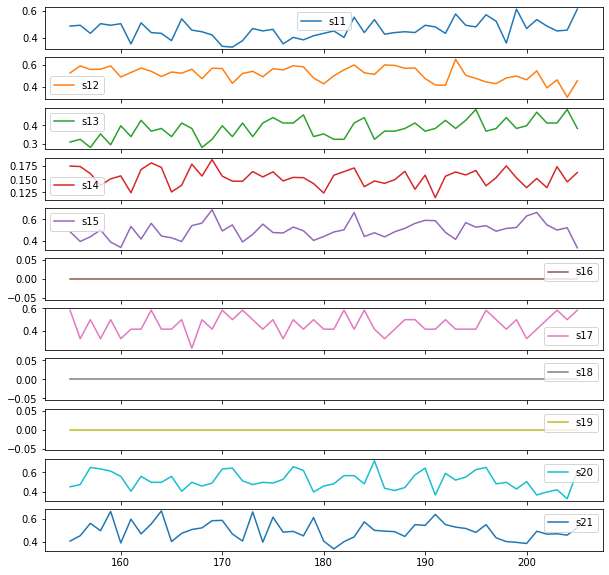

In [26]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 11-21 
ax2 = engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(10,10))

[Keras LSTM](https://keras.io/layers/recurrent/) layers expect an input in the shape of a numpy array of 3 dimensions (samples, time steps, features) where samples is the number of training sequences, time steps is the look back window or sequence length and features is the number of features of each sequence at each time step. 

In [27]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [28]:
# pick the feature columns 
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

In [29]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols)) 
           for id in train_df['id'].unique())

In [30]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(17631, 30, 25)

In [31]:
# generator for the sequences
seq_gen_test = (list(gen_sequence(test_df[test_df['id']==id], sequence_length, sequence_cols)) 
           for id in test_df['id'].unique())

# generate sequences and convert to numpy array
seq_array_test = np.concatenate(list(seq_gen_test)).astype(np.float32)
seq_array_test.shape

(10096, 30, 25)

In [32]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [33]:
# generate labels
label_gen = [gen_labels(train_df[train_df['id']==id], sequence_length, ['label1']) 
             for id in train_df['id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(17631, 1)

In [34]:
# generate test labels
label_gen_test = [gen_labels(test_df[test_df['id']==id], sequence_length, ['label1']) 
             for id in test_df['id'].unique()]
label_array_test = np.concatenate(label_gen_test).astype(np.float32)
label_array_test.shape

(10096, 1)

## LSTM Network
Next, we build a deep network. The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units. Dropout is also applied after each LSTM layer to control overfitting. Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.

In [35]:
from time import time

In [36]:
start = time()

# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [37]:
#print(model.summary())

In [38]:

# fit the network
history = model.fit(seq_array, label_array, epochs=10, batch_size=200, validation_split=0.2, verbose=1)

end = time()

print(end-start)

Epoch 1/10
71/71 [==============================] - 22s 259ms/step - loss: 0.2064 - accuracy: 0.9168 - val_loss: 0.1220 - val_accuracy: 0.9419
Epoch 2/10
71/71 [==============================] - 19s 265ms/step - loss: 0.0943 - accuracy: 0.9630 - val_loss: 0.0885 - val_accuracy: 0.9688
Epoch 3/10
71/71 [==============================] - 18s 247ms/step - loss: 0.0615 - accuracy: 0.9752 - val_loss: 0.0439 - val_accuracy: 0.9804
Epoch 4/10
71/71 [==============================] - 14s 192ms/step - loss: 0.0531 - accuracy: 0.9782 - val_loss: 0.0362 - val_accuracy: 0.9824
Epoch 5/10
71/71 [==============================] - 11s 156ms/step - loss: 0.0482 - accuracy: 0.9803 - val_loss: 0.0329 - val_accuracy: 0.9853
Epoch 6/10
71/71 [==============================] - 11s 156ms/step - loss: 0.0451 - accuracy: 0.9815 - val_loss: 0.0302 - val_accuracy: 0.9872
Epoch 7/10
71/71 [==============================] - 13s 186ms/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.0383 - val_accuracy: 0.9819

In [39]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           50400     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 80,651
Trainable params: 80,651
Non-trainable params: 0
_________________________________________________________________
None


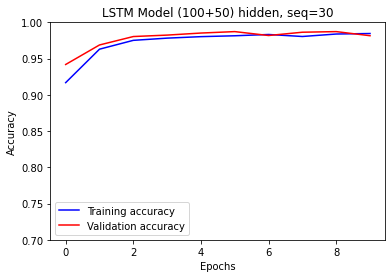

In [40]:
plt.plot(history.history['accuracy'],
         'b',
         label='Training accuracy')
plt.plot(history.history['val_accuracy'],
         'r',
         label='Validation accuracy')
plt.legend(loc='best')
plt.title("LSTM Model (100+50) hidden, seq=30")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.7,1])
plt.show()

In [41]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

89/89 [==============================] - 5s 61ms/step - loss: 0.0360 - accuracy: 0.9848
Accurracy: 0.9847995042800903


In [45]:
# make predictions and compute confusion matrix
predict_x = model.predict(seq_array,verbose=1, batch_size=200)
y_pred=np.argmax(predict_x,axis=1)
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

89/89 [==============================] - 4s 50ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[16031,     0],
       [ 1600,     0]])

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

Text(0.5, 15.0, 'Predicted Label')

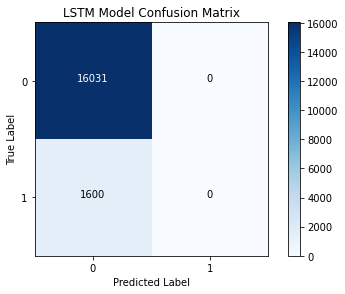

In [47]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("LSTM Model Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [48]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

precision =  0.0 
 recall =  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:

f1 = 2 * (precision * recall) / (precision + recall)
print( 'Precision: ', precision, '\n', 'Recall: ', recall,'\n', 'F1-score:', f1)

Precision:  0.0 
 Recall:  0.0 
 F1-score: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_train, tpr_train, thresholds_train = roc_curve(y_true, y_pred)
auc_train = auc(fpr_train, tpr_train)

In [51]:
scores_test = model.evaluate(seq_array_test, label_array_test, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))

316/316 - 4s - loss: 0.0078 - accuracy: 0.9970 - 4s/epoch - 12ms/step
Accurracy: 0.9970285296440125


In [54]:
# make predictions and compute confusion matrix
pred_x = model.predict(seq_array_test)
y_pred_test = np.argmax(pred_x,axis=1)
y_true_test = label_array_test
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
cm

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[10036,     0],
       [   60,     0]])

Text(0.5, 15.0, 'Predicted Label')

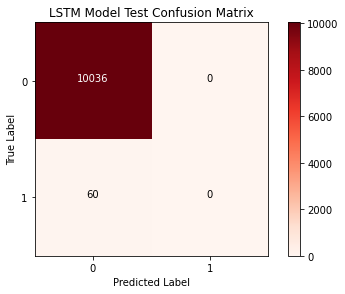

In [55]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("LSTM Model Test Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [56]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )

Precision:  0.0 
 Recall:  0.0 
 F1-score: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [57]:
results_df = pd.DataFrame([[scores_test[1],precision_test,recall_test,f1_test],
                          [0.94, 0.952381, 0.8, 0.869565]],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                         index = ['LSTM',
                                 'Template Best Model'])
results_df

,Accuracy,Precision,Recall,F1-score
LSTM,0.997029,0.000000,0.0,NaN
Template Best Model,0.940000,0.952381,0.8,0.869565


In [58]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_test)
auc_test = auc(fpr_test, tpr_test)

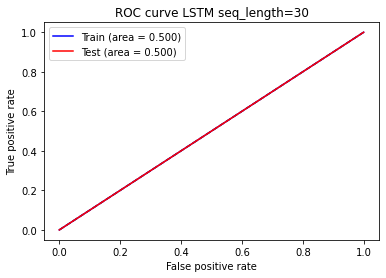

In [59]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train (area = {:.3f})'.format(auc_train), color="blue")
plt.plot(fpr_test, tpr_test, label='Test (area = {:.3f})'.format(auc_test), color="red")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LSTM seq_length=30')
plt.legend(loc='best')
plt.show()


Comparing the above test results to the predictive maintenance template, we see that the LSTM results are better than the template. It should be noted that the  data set used here is very small and deep learning models are known to perform superior with large datasets so for a more fair comparison larger datasets should be used.

# **Bees Algorithm for Training Deep Models**

In [60]:
!pip install tensorflow==2.0.0-beta1
import tensorflow as tf

tf.__version__
print("TensorFlow version: {}".format(tf.__version__))


print("Eager execution: {}".format(tf.executing_eagerly()))

tf.keras.__version__


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-beta1 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcolab20220516111314, 2.8.1+zzzcolab20220518083849, 2.8.2, 2.8.2+zzzcolab20220523105045, 2.8.2+zzzcolab20220527125636, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERR

'2.8.0'

In [61]:
loss_object = tf.keras.losses.binary_crossentropy

def loss(model, x, y):
    y_ = model(x)
    y_ = tf.reshape(y_,[y.shape[0],])
    return loss_object(y_true=y, y_pred=y_)


In [62]:
def get_best_solution(beeList):
  #best_tensor_index = tf.math.argmin(input = lossList)
  #best_index = tf.cast(best_tensor_index,dtype=tf.int64)
  #print(best_index)
  
  beeList.sort(key=lambda bee: bee.Loss, reverse=False)
  best_loss = beeList[0].Loss
  best_weights = beeList[0].Weight
  best_model = beeList[0].Model
      
  return best_loss,best_weights,best_model

In [63]:
def performBeeDance(weights,ngh):
  
  #random.shuffle(weights)
  print("Onceki ağırlıklar", weights)
  my_weights = np.array(weights)
  w_rnd = my_weights.astype("int32")
  print(w_rnd)
  for w in weights:
      w_random = tf.random.uniform(tf.shape(w_rnd), minval=-ngh, maxval=ngh, dtype=tf.float32, seed=None, name=None)
      w_tf = w + w_random
      if w != 0:
        w = w_tf
  print(w) 

In [64]:
def performBeeMutation(weights,ngh):
  
  random.shuffle(weights)
  

In [65]:
import numpy as np
import random

maxIt = 10
nScout = 3
nSelectedSite = 1
nEliteSite = 1
nSelectedSiteBee = 1
nEliteSiteBee = 1
ngh = 0.1   # Neighborhood Radius
beeList = []
rdamp = 0.95  # Neighborhood Radius Damp Rate

class Bee():
    def __init__(self,Weight,Loss,Model):
        self.Weight = Weight
        self.Loss = Loss
        self.Model = Model

    def __getWeight__(self):
        return self.Weight

    def __getLoss__(self):
        return self.Loss

    def __getModel__(self):
        return self.Model

    Weight: []
    Loss: float
    Model: object  

initial_loses = []
initial_weights = []
initial_models = []

#Create initial Solutions

for i in range(nScout):
   # build the network
    nb_features = seq_array.shape[2]
    nb_out = label_array.shape[1]

    model = Sequential()

    model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
    
    model.add(Dropout(0.2))
    model.add(LSTM(
          units=50,
          return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(units=nb_out, activation='sigmoid'))

    l = loss(model, seq_array, label_array)
    
    bee = Bee(0,0,None)
    bee.Weight = model.weights
    #bee.Loss = l
    bee.Loss = tf.reduce_mean(l)
    bee.Model = model
    
    beeList.append(bee)
   
    initial_loses.append(l)
    initial_weights.append(model.weights)
    initial_models.append(model)
    

In [66]:
bestLoss, bestWeight, bestModel = get_best_solution(beeList)

In [67]:
import math

def recruitmentPhase(beeList, nSelectedSite, nEliteSite, ngh):
        

        beeList.sort(key=lambda bee: bee.Loss, reverse=False)

        # Elite Sites
        for i in range(nEliteSite):
          old_weight = beeList[i].Model.get_weights()
          best_new_loss = math.inf
          local_model = beeList[i].Model

          for j in range(nEliteSiteBee):

            local_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
            history = local_model.fit(seq_array, label_array, epochs=1, batch_size=200, validation_split=0.2, verbose=1)
            new_loss, new_acc = local_model.evaluate(seq_array, label_array, verbose=0)
            new_weight = local_model.get_weights()              
            beeList[i].Model.set_weights = old_weight               
                
            if new_loss < best_new_loss:
                best_new_loss = new_loss
                best_new_weight = new_weight

            if best_new_loss < beeList[i].Loss:
                beeList[i].Model = local_model
                beeList[i].Loss = best_new_loss
                beeList[i].Weight = best_new_weight

        # Selected Non-Elite Sites
        for i in range(nEliteSite,nSelectedSite):
            
            old_weight = beeList[i].Model.get_weights()
            
            best_new_loss = math.inf
            new_weight = performBeeMutation(old_weight, ngh)
            beeList[i].Model.set_weights = new_weight
            local_model = beeList[i].Model

            for j in range(nSelectedSiteBee):
                local_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
                history = local_model.fit(seq_array, label_array, epochs=1, batch_size=200, validation_split=0.2, verbose=1)
                new_loss, new_acc = local_model.evaluate(seq_array, label_array, verbose=0)
                new_weight = local_model.get_weights()              
                beeList[i].Model.set_weights = old_weight  

                #new_weight = performBeeMutation(old_weight, ngh)
                #beeList[i].Model.set_weights = new_weight
                #new_loss = loss(beeList[i].Model, seq_array, label_array)

              
                if new_loss < best_new_loss:
                    best_new_loss = new_loss
                    best_new_weight = new_weight

            if best_new_loss < beeList[i].Loss:
                beeList[i].Loss = best_new_loss
                beeList[i].Weight = best_new_weight
                beeList[i].Model.set_weights = best_new_weight

In [68]:
def globalPhase(beeList, nSelectedSite, nScoutBee):
    # Non - Selected Sites
    for i in range(nSelectedSite,nScoutBee):
      
        nb_features = seq_array.shape[2]
        nb_out = label_array.shape[1]

        model = Sequential()

        model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(
          units=50,
          return_sequences=False))
        model.add(Dropout(0.2))

        model.add(Dense(units=nb_out, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(seq_array, label_array, epochs=1, batch_size=200, validation_split=0.2, verbose=1)
        loss, accuracy = model.evaluate(seq_array, label_array, verbose=0)

        #l = loss(model, seq_array, label_array)
    
        # beeList[i].Loss = l
        beeList[i].Loss = tf.reduce_mean(loss)
        beeList[i].Weight = model.weights
        beeList[i].Model = model

In [69]:
from time import time

In [70]:
# Array to Hold Best Cost Values
BestCost = [0] * maxIt

# site abandonment threshold
sat = 300000
counter = 0
improvement = None

start = time()

for it in range(4):
  
    recruitmentPhase(beeList, nSelectedSite, nEliteSite, ngh)
    globalPhase(beeList, nSelectedSite, nScout)
    best_loss,best_weights,best_model = get_best_solution(beeList)
    
    #Store Best Cost Ever Found
    BestCost[it] = best_loss
    
    
    if BestCost[it] == BestCost[it-1]:
        counter+=1
        impovement = False
      
    mod = tf.math.mod(counter, sat) 
    
    
    best_loss_sat = math.inf
    best_weights_sat = math.inf
    best_model_sat = math.inf
    
    if counter==sat and (not impovement):
      globalPhase(beeList, 0, nSelectedSite)
      globalPhase(beeList, nSelectedSite, nScout)
      best_loss_sat,best_weights_sat,best_model_sat = get_best_solution(beeList)
      best_loss,best_weights,best_model = get_best_solution(beeList)
      counter = 0

      if best_loss_sat < best_loss:
          best_loss = best_loss_sat
          best_weights = best_weights_sat
          best_model = best_model_sat

    best_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
    history = best_model.fit(seq_array, label_array, epochs=1, batch_size=200, validation_split=0.2, verbose=1)
    loss, accuracy = best_model.evaluate(seq_array, label_array, verbose=0)
    print("Loss",loss)
    print("Acc",accuracy)
    #Store Best Cost Ever Found
    BestCost[it] = loss
    
    
    #Display Iteration Information
    #print(['Iteration ' + str(it) + ': Best Cost = ' + str(BestCost[it])])
  
    #Damp Neighborhood Radius
    #rdamp = 0.95  # Neighborhood Radius Damp Rate
    #ngh = ngh * rdamp
    
    sc=0.001  # Shrink all the patches using the shrinking constant (sc) variable
    ngh = ngh*(l-sc)

end = time()

print("Total training time:", end-start)
    


71/71 [==============================] - 17s 182ms/step - loss: 0.0761 - accuracy: 0.9696 - val_loss: 0.0569 - val_accuracy: 0.9796
Loss 0.0602211132645607
Acc 0.9767454862594604
71/71 [==============================] - 16s 173ms/step - loss: 0.0471 - accuracy: 0.9806 - val_loss: 0.0474 - val_accuracy: 0.9776
Loss 0.04080953821539879
Acc 0.9819068908691406
71/71 [==============================] - 18s 195ms/step - loss: 0.0491 - accuracy: 0.9793 - val_loss: 0.0328 - val_accuracy: 0.9872
Loss 0.03554907813668251
Acc 0.9863308668136597
71/71 [==============================] - 21s 233ms/step - loss: 0.0439 - accuracy: 0.9821 - val_loss: 0.0342 - val_accuracy: 0.9850
Loss 0.031422898173332214
Acc 0.9865010380744934
Total training time: 494.5730924606323


In [71]:
best_model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
history = best_model.fit(seq_array, label_array, epochs=10, batch_size=200, validation_split=0.2, verbose=1)
loss, accuracy = best_model.evaluate(seq_array, label_array, verbose=0)
print("BA Loss",loss)
print("BA Acc",accuracy)

Epoch 1/10
71/71 [==============================] - 20s 217ms/step - loss: 0.0451 - accuracy: 0.9816 - val_loss: 0.0309 - val_accuracy: 0.9878
Epoch 2/10
71/71 [==============================] - 15s 205ms/step - loss: 0.0365 - accuracy: 0.9852 - val_loss: 0.0388 - val_accuracy: 0.9833
Epoch 3/10
71/71 [==============================] - 15s 206ms/step - loss: 0.0355 - accuracy: 0.9853 - val_loss: 0.0234 - val_accuracy: 0.9892
Epoch 4/10
71/71 [==============================] - 17s 233ms/step - loss: 0.0307 - accuracy: 0.9873 - val_loss: 0.0262 - val_accuracy: 0.9898
Epoch 5/10
71/71 [==============================] - 14s 197ms/step - loss: 0.0308 - accuracy: 0.9871 - val_loss: 0.0415 - val_accuracy: 0.9819
Epoch 6/10
71/71 [==============================] - 18s 252ms/step - loss: 0.0316 - accuracy: 0.9865 - val_loss: 0.0628 - val_accuracy: 0.9733
Epoch 7/10
71/71 [==============================] - 14s 188ms/step - loss: 0.0316 - accuracy: 0.9875 - val_loss: 0.0318 - val_accuracy: 0.9853

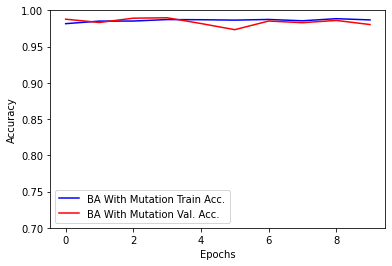

In [72]:
plt.plot(history.history['accuracy'],
         'b',
         label='BA With Mutation Train Acc.')
plt.plot(history.history['val_accuracy'],
         'r',
         label='BA With Mutation Val. Acc.')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.7,1])
plt.show()

In [73]:
loss_test, accuracy_test = best_model.evaluate(seq_array_test, label_array_test, verbose=0)
print("BA Test Loss",loss)
print("BA Test Acc",accuracy)


BA Test Loss 0.03602669760584831
BA Test Acc 0.9835516810417175


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [76]:
# make predictions and compute confusion matrix
predict_x = best_model.predict(seq_array)
y_pred = np.argmax(predict_x,axis=1)
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[16031,     0],
       [ 1600,     0]])

In [78]:
# make predictions and compute confusion matrix
pred_x = best_model.predict(seq_array_test)
y_pred_test = np.argmax(pred_x,axis=1)
y_true_test = label_array_test
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm_test = confusion_matrix(y_true_test, y_pred_test)
cm_test

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[10036,     0],
       [   60,     0]])

Text(0.5, 15.0, 'Predicted Label')

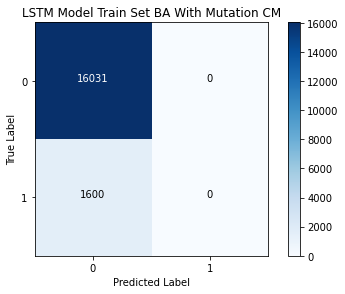

In [79]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("LSTM Model Train Set BA With Mutation CM")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

Text(0.5, 15.0, 'Predicted Label')

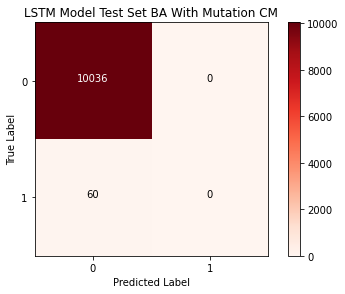

In [80]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("LSTM Model Test Set BA With Mutation CM")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm_test.max() / 2.
for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
    plt.text(j, i, format(cm_test[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_test[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [81]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

f1 = 2 * (precision * recall) / (precision + recall)
print( 'Precision: ', precision, '\n', 'Recall: ', recall,'\n', 'F1-score:', f1)

precision =  0.0 
 recall =  0.0
Precision:  0.0 
 Recall:  0.0 
 F1-score: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [82]:
# compute precision and recall
precision = precision_score(y_true_test, y_pred_test)
recall = recall_score(y_true_test, y_pred_test)
print( 'precision = ', precision, '\n', 'recall = ', recall)

f1 = 2 * (precision * recall) / (precision + recall)
print( 'Precision: ', precision, '\n', 'Recall: ', recall,'\n', 'F1-score:', f1)

precision =  0.0 
 recall =  0.0
Precision:  0.0 
 Recall:  0.0 
 F1-score: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_train, tpr_train, thresholds_train = roc_curve(y_true, y_pred)
auc_train = auc(fpr_train, tpr_train)

scores_test = best_model.evaluate(seq_array_test, label_array_test, verbose=2)
print('Test Accurracy: {}'.format(scores_test[1]))

316/316 - 4s - loss: 0.0062 - accuracy: 0.9973 - 4s/epoch - 12ms/step
Test Accurracy: 0.9973256587982178


In [84]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )

Precision:  0.0 
 Recall:  0.0 
 F1-score: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [85]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_test)
auc_test = auc(fpr_test, tpr_test)

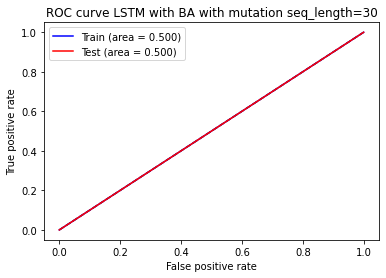

In [86]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='Train (area = {:.3f})'.format(auc_train),color="blue")
plt.plot(fpr_test, tpr_test, label='Test (area = {:.3f})'.format(auc_test),color="red")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LSTM with BA with mutation seq_length=30')
plt.legend(loc='best')
plt.show()